In [ ]:
# API Key:LX71H2XX0HSO5PAO 

In [2]:
import requests
import json
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

import statsmodels.api as sm
import warnings
from itertools import product

warnings.filterwarnings('ignore')
# plt.style.use('seaborn-poster')

In [3]:
# getting the data from aplhavantage using API key
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol=CRM&outputsize=full&apikey=LX71H2XX0HSO5PAO'
resp = requests.get(url)
resp.json()['Meta Data']

{'1. Information': 'Daily Time Series with Splits and Dividend Events',
 '2. Symbol': 'CRM',
 '3. Last Refreshed': '2020-02-14',
 '4. Output Size': 'Full size',
 '5. Time Zone': 'US/Eastern'}

In [4]:
df = pd.DataFrame(resp.json()['Time Series (Daily)']) # converting json to dataframe

In [5]:
df.tail() # initial look of df

,2020-02-14,2020-02-13,2020-02-12,2020-02-11,2020-02-10,2020-02-07,2020-02-06,2020-02-05,2020-02-04,2020-02-03,...,2004-07-07,2004-07-06,2004-07-02,2004-07-01,2004-06-30,2004-06-29,2004-06-28,2004-06-25,2004-06-24,2004-06-23
4. close,189.9500,188.6400,189.4600,189.1100,189.1200,185.7200,186.7300,185.4900,188.3400,185.4200,...,16.3100,17.0000,16.9800,16.0300,16.0700,16.4000,16.0000,15.8000,16.7600,17.2000
5. adjusted close,189.9500,188.6400,189.4600,189.1100,189.1200,185.7200,186.7300,185.4900,188.3400,185.4200,...,4.0775,4.2500,4.2450,4.0075,4.0175,4.1000,4.0000,3.9500,4.1900,4.3000
6. volume,3598651,3129214,4533345,4298229,3872433,3712487,4102710,6161868,3982723,4755057,...,446900,304200,248300,438700,521900,528000,567700,1677500,2221800,10893600
7. dividend amount,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
8. split coefficient,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,...,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [6]:
# saving as csv
# df.to_csv('CRM_stock')

In [7]:
# transposing the dataframe
pd.to_datetime(df.columns)
df_transposed = df.transpose().set_index(df.columns)

In [8]:
df_transposed.head() # initial look

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
2020-02-14,189.3500,190.2500,188.1000,189.9500,189.9500,3598651,0.0000,1.0000
2020-02-13,188.5000,191.0500,188.4200,188.6400,188.6400,3129214,0.0000,1.0000
2020-02-12,189.7100,190.5200,186.7700,189.4600,189.4600,4533345,0.0000,1.0000
2020-02-11,191.4800,192.6000,188.6500,189.1100,189.1100,4298229,0.0000,1.0000
2020-02-10,186.1700,189.2700,185.5618,189.1200,189.1200,3872433,0.0000,1.0000


In [9]:
# removing unused features
df_transposed.drop(columns=['1. open','2. high', '3. low', '4. close','7. dividend amount','8. split coefficient'],inplace=True)

In [10]:
df_transposed.head() 

,5. adjusted close,6. volume
2020-02-14,189.9500,3598651
2020-02-13,188.6400,3129214
2020-02-12,189.4600,4533345
2020-02-11,189.1100,4298229
2020-02-10,189.1200,3872433


In [11]:
# converting dtypes to float
df_transposed['5. adjusted close'] = df_transposed['5. adjusted close'].astype(float)
df_transposed['6. volume'] = df_transposed['6. volume'].astype(float)

In [12]:
df_transposed.sort_index(ascending=True,inplace=True) # resampling time-index 

In [13]:
df_transposed.index = pd.to_datetime(df_transposed.index) # converting to datetime

In [14]:
df_transposed.index

DatetimeIndex(['2004-06-23', '2004-06-24', '2004-06-25', '2004-06-28',
               '2004-06-29', '2004-06-30', '2004-07-01', '2004-07-02',
               '2004-07-06', '2004-07-07',
               ...
               '2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06',
               '2020-02-07', '2020-02-10', '2020-02-11', '2020-02-12',
               '2020-02-13', '2020-02-14'],
              dtype='datetime64[ns]', length=3940, freq=None)

In [15]:
# resampling to weekly, monthly, quarterly and yearly periods

df_weekly = df_transposed.resample('W').mean()
df_monthly = df_transposed.resample('M').mean()
df_quart = df_transposed.resample('Q-DEC').mean()
df_annual = df_transposed.resample('A-DEC').mean()

In [16]:
df_weekly.head()

,5. adjusted close,6. volume
2004-06-27,4.146667,4.930967e+06
2004-07-04,4.074000,4.609200e+05
2004-07-11,4.090625,3.612750e+05
2004-07-18,3.991000,4.952800e+05
2004-07-25,3.489500,2.005720e+06


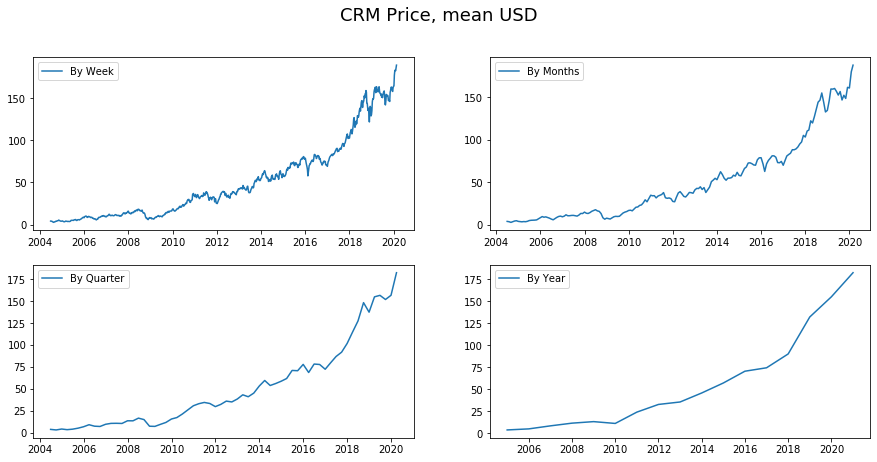

In [17]:
# plots

fig = plt.figure(figsize=[15, 7])
plt.suptitle('CRM Price, mean USD', fontsize=18)

plt.subplot(221)
plt.plot(df_weekly['5. adjusted close'], '-', label='By Week')
plt.legend()

plt.subplot(222)
plt.plot(df_monthly['5. adjusted close'], '-', label='By Months')
plt.legend()

plt.subplot(223)
plt.plot(df_quart['5. adjusted close'], '-', label='By Quarter')
plt.legend()

plt.subplot(224)
plt.plot(df_annual['5. adjusted close'], '-', label='By Year')
plt.legend()

# plt.tight_layout()
plt.show()

We can see on the graph when we take average of larger time periods the line gets smoother and smoother. I will predict weekly and monthly stock price of the Salesforce Inc.

In [18]:
# rename price column
def rename_col(df,col):
    df.rename(columns={col: "Price"},inplace=True)

In [19]:
#renaming
rename_col(df_weekly,'5. adjusted close')
rename_col(df_monthly,'5. adjusted close')
rename_col(df_quart,'5. adjusted close')
rename_col(df_annual,'5. adjusted close')

In [20]:
# dickey-fuller test for stationary check
def DF_test(df):
    plt.figure(figsize=[10,5])
    sm.tsa.seasonal_decompose(df.Price).plot()
    print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df.Price)[1])
    plt.show()

Dickey–Fuller test: p=1.000000


<Figure size 720x360 with 0 Axes>

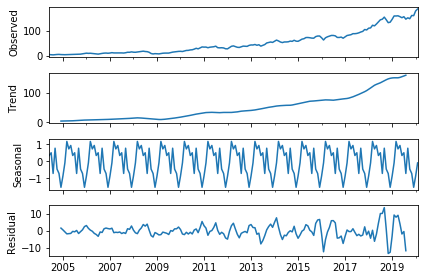

In [21]:
DF_test(df_monthly)

Dickey–Fuller test: p=0.998958


<Figure size 720x360 with 0 Axes>

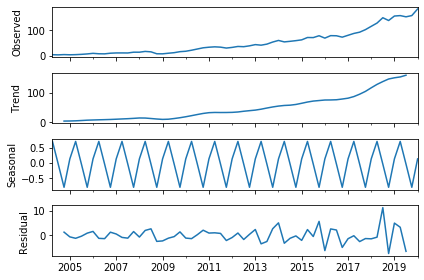

In [22]:
DF_test(df_quart)

* The data is not stationary as we can see on the graph. We can use oother methods to check this.

In [23]:
# we split the data into 3 parts and compare its mean and variance
# weekly 
one, two, three = np.split(
        df_weekly['Price'].sample(
        frac=1), [int(.25*len(df_weekly['Price'])),
        int(.75*len(df_weekly['Price']))])

mean1, mean2, mean3 = one.mean(), two.mean(), three.mean()
var1, var2, var3 = one.var(), two.var(), three.var()

print (mean1, mean2, mean3)
print (var1, var2, var3)

47.20875490196079 51.174300551470594 53.19059288617885
1587.546236522451 2327.931686675925 2323.0640962440443


In [24]:
# we split the data into 3 parts and compare its mean and variance
# monthly 
one, two, three = np.split(
        df_monthly['Price'].sample(
        frac=1), [int(.25*len(df_monthly['Price'])),
        int(.75*len(df_monthly['Price']))])

mean1, mean2, mean3 = one.mean(), two.mean(), three.mean()
var1, var2, var3 = one.var(), two.var(), three.var()

print (mean1, mean2, mean3)
print (var1, var2, var3)

42.64424232781516 53.9546054669066 53.015184372327404
1394.3569787241804 2482.77485555282 2406.920739948871


In [25]:
# we split the data into 3 parts and compare its mean and variance
# quarterly 
one, two, three = np.split(
        df_quart['Price'].sample(
        frac=1), [int(.25*len(df_quart['Price'])),
        int(.75*len(df_quart['Price']))])

mean1, mean2, mean3 = one.mean(), two.mean(), three.mean()
var1, var2, var3 = one.var(), two.var(), three.var()

print (mean1, mean2, mean3)
print (var1, var2, var3)

51.65228570894931 55.20886199182731 42.25418674957083
2027.5138950891064 2621.8061206555813 2032.6784695082274


* The above code creates three new series. I randomly selected 25% for series one and 75% for the two and three

In [26]:
# Box-Cox Transformations
def box_cox(df):
    df['Price_box'], lmbda = stats.boxcox(df['Price'])
    print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df['Price_box'])[1])

In [41]:
#weekly, quarterly
box_cox(df_weekly)
box_cox(df_quart)

Dickey–Fuller test: p=0.904456
Dickey–Fuller test: p=0.922761


In [42]:
df_monthly['Price_box'], lmbda = stats.boxcox(df_monthly['Price'])
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df_monthly['Price_box'])[1])

Dickey–Fuller test: p=0.868690


* Above code performes Box-Cox transformation, and we can see that the series are not stationary

In [28]:
def prob_plot(df):
    fig = plt.figure(figsize=(12,5))
    ax1 = fig.add_subplot(211)
    prob = stats.probplot(df['Price'], dist=stats.norm, plot=ax1)
    ax1.set_xlabel('')
    ax1.set_title('Probplot against normal distribution')
    ax2 = fig.add_subplot(212)
    xt, _ = stats.boxcox(df['Price_box'])
    prob = stats.probplot(xt, dist=stats.norm, plot=ax2)
    ax2.set_title('Probplot after Box-Cox transformation')
    plt.show()

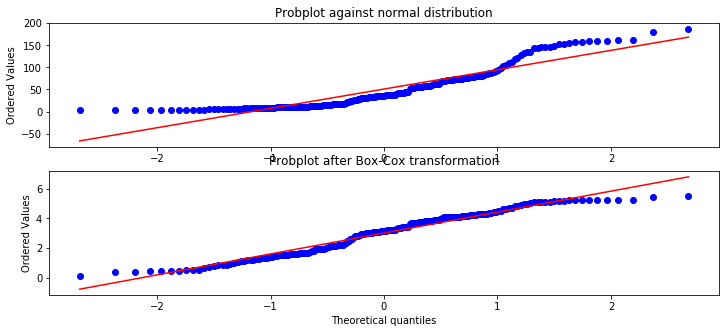

In [29]:
prob_plot(df_monthly)

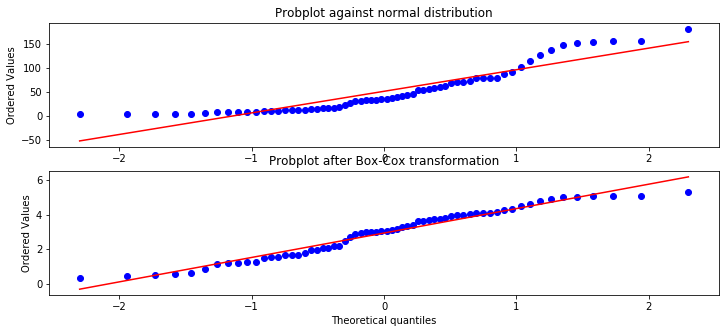

In [30]:
prob_plot(df_quart)

* Box-Cox transformation did not help to make the data stationary

In [31]:
# log tranformation
def log_transformation(df):
    df['price_log']=df['Price'].apply(lambda x: np.log(x))
    print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df['price_log'])[1])

In [32]:
# log tranformation
log_transformation(df_monthly)

Dickey–Fuller test: p=0.541840


In [33]:
# Seasonal differentiation
df_monthly['prices_box_diff'] = df_monthly.Price_box - df_monthly.Price_box.shift(12)
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df_monthly.prices_box_diff[12:])[1])

Dickey–Fuller test: p=0.003887


Dickey–Fuller test: p=0.003887


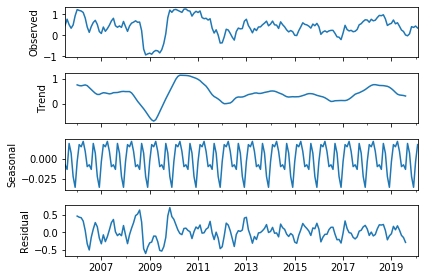

In [34]:
sm.tsa.seasonal_decompose(df_monthly['prices_box_diff'][13:]).plot()   
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df_monthly['prices_box_diff'][12:])[1])

plt.show()

* Monthly data is stationarized

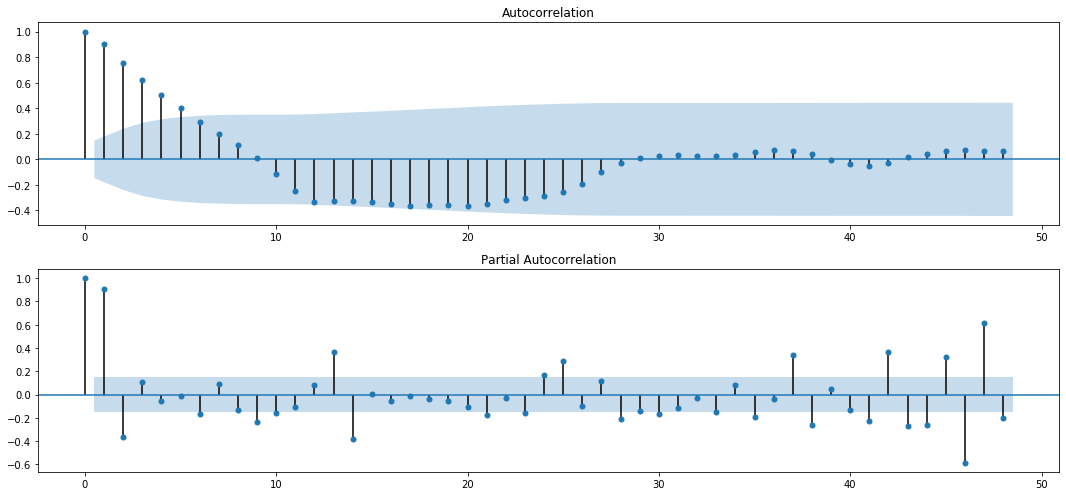

In [35]:
# model selection
# Initial approximation of parameters using Autocorrelation and Partial Autocorrelation Plots
plt.figure(figsize=(15,7))
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(df_monthly.prices_box_diff[12:].values.squeeze(), lags=48, ax=ax)
ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(df_monthly.prices_box_diff[12:].values.squeeze(), lags=48, ax=ax)
plt.tight_layout()
plt.show()

* Initial parameters according to the graph above:
    - P (0-2)
    - D (0)
    - Q (0-5)
    - seasonality (12)

In [36]:
# fitting to the model
# MA, AR values
p = range(0,2)
d = 1
q = range(0,5)

# seasonal order
P = range(0,2)
D = 1
Q = range(0,2)


parameters = product(p, q, P, Q)
parameters_list = list(parameters)

results = []
best_aic = float("inf")
warnings.filterwarnings('ignore')

for param in parameters_list:
    try:
        model=sm.tsa.statespace.SARIMAX(df_monthly.Price_box, order=(param[0],d,param[0]), 
                                        seasonal_order=(param[2], d,param[3], 12)).fit(disp=-1)
    except ValueError:
        print('wrong parameters:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
        results.append([param, model.aic])    

        


In [37]:
# Best Models
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())
print(best_model.summary())

     parameters         aic
2  (1, 0, 0, 1) -172.368628
1  (0, 0, 0, 1) -162.678673
0  (0, 0, 0, 0)  -62.385870
                                 Statespace Model Results                                 
Dep. Variable:                          Price_box   No. Observations:                  189
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                  90.184
Date:                            Sun, 16 Feb 2020   AIC                           -172.369
Time:                                    11:24:30   BIC                           -159.687
Sample:                                06-30-2004   HQIC                          -167.225
                                     - 02-29-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar

Dickey–Fuller test:: p=0.000000


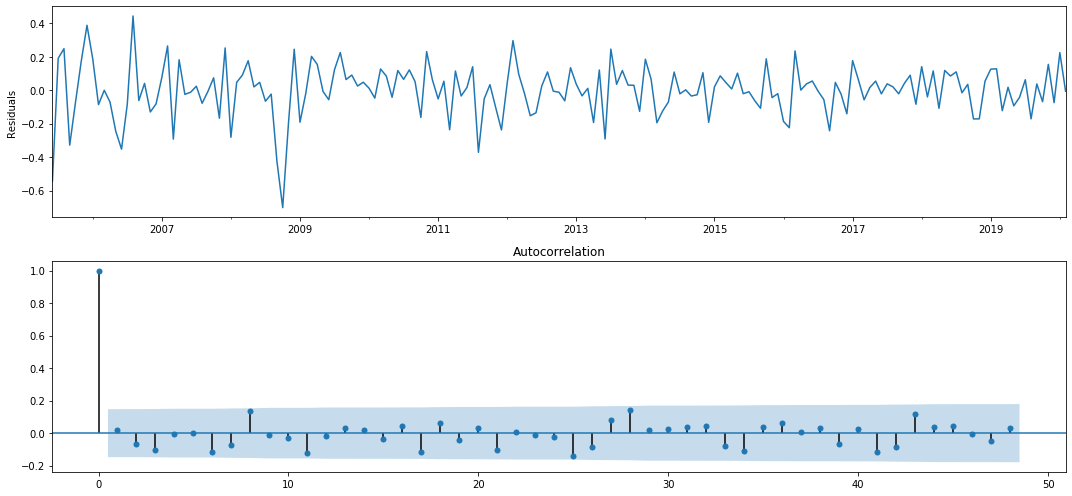

In [38]:
# STL-decomposition
plt.figure(figsize=(15,7))
plt.subplot(211)
best_model.resid[12:].plot()
plt.ylabel(u'Residuals')
ax = plt.subplot(212)
sm.graphics.tsa.plot_acf(best_model.resid[13:].values.squeeze(), lags=48, ax=ax)

print("Dickey–Fuller test:: p=%f" % sm.tsa.stattools.adfuller(best_model.resid[13:])[1])

plt.tight_layout()
plt.show()

In [46]:
len(df_monthly)

189

In [43]:
# Inverse Box-Cox Transformation Function
def invboxcox(y,lmbda):
    if lmbda == 0:
        return(np.exp(y))
    else:
        return(np.exp(np.log(lmbda*y+1)/lmbda))

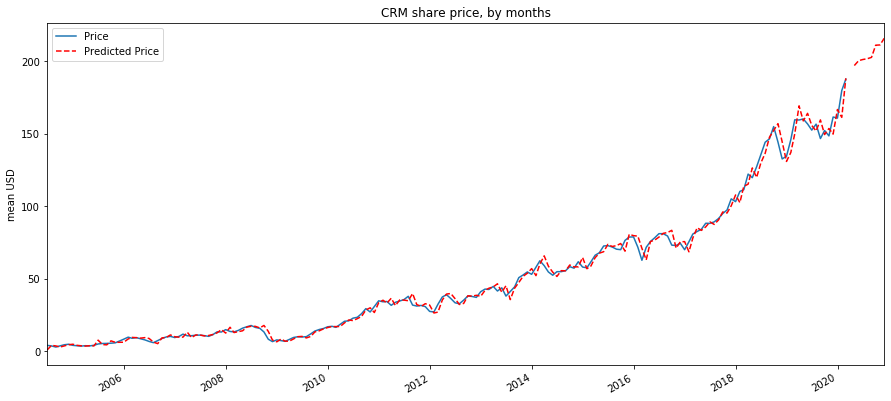

In [69]:
# Prediction

df_month2 = df_monthly[['Price']]

date_list = [datetime(2020, 2, 29),datetime(2020, 3, 30), 
             datetime(2020, 4, 30), datetime(2020, 5, 31), datetime(2020, 6, 30), 
             datetime(2020, 7, 31), datetime(2020, 8, 31), datetime(2020, 9, 30), 
             datetime(2020, 10, 31),datetime(2020, 11, 30)]

future = pd.DataFrame(index=date_list, columns= df_monthly.columns)
df_month2 = pd.concat([df_month2, future])
df_month2['forecast'] = invboxcox((best_model.predict(start=0, end=200)),lmbda)
plt.figure(figsize=(15,7))
df_month2.Price.plot()
df_month2.forecast.plot(color='r', ls='--', label='Predicted Price')
plt.legend()
plt.title('CRM share price, by months')
plt.ylabel('mean USD')
plt.show()

In [71]:
df_month2.tail(10)

,6. volume,Price,Price_box,price_log,prices_box_diff,forecast
2020-02-29,NaN,NaN,NaN,NaN,NaN,188.376374
2020-03-30,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-30,NaN,NaN,NaN,NaN,NaN,197.214431
2020-05-31,NaN,NaN,NaN,NaN,NaN,200.578699
2020-06-30,NaN,NaN,NaN,NaN,NaN,201.373163
2020-07-31,NaN,NaN,NaN,NaN,NaN,201.888689
2020-08-31,NaN,NaN,NaN,NaN,NaN,202.836084
2020-09-30,NaN,NaN,NaN,NaN,NaN,211.246593
2020-10-31,NaN,NaN,NaN,NaN,NaN,211.426053
2020-11-30,NaN,NaN,NaN,NaN,NaN,215.996953
